In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

In [2]:
a = 2
L = 100
N = 1000
dx = L/N
x = np.arange(-L/2, L/2, dx)

In [3]:
kappa = 2*np.pi*np.fft.fftfreq(N, d=dx)

In [4]:
def assemble(u):
    return np.concatenate((u.real, u.imag)).astype('float64')

In [5]:
u0 = np.zeros_like(x)
u0[int((L/2-L/10)/dx):int((L/2+L/10)/dx)] = 1
u0hat = np.fft.fft(u0)
u0hat_ri = assemble(u0hat)

In [6]:
t0 = 0
t1 = 100
dt = 0.1
t = np.arange(t0, t1, dt)

In [7]:
def rhsHeat(uhat_ri, t, kappa, a):
    uhat = uhat_ri[:N] +(1j)*uhat_ri[N:]
    d_uhat = -a**2 * (np.power(kappa, 2))*uhat
    d_uhat_ri = assemble(d_uhat)
    return d_uhat_ri #- 0.1*t

In [8]:
uhat_ri = integrate.odeint(rhsHeat, u0hat_ri, t, args=(kappa, a))

In [9]:
uhat = uhat_ri[:, :N] +(1j)*uhat_ri[:, N:]

In [10]:
u = np.zeros_like(uhat)

In [11]:
for k in range(len(t)):
    u[k,:] = np.fft.ifft(uhat[k,:])
u = u.real

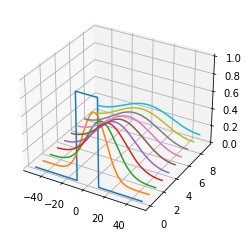

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
plt.set_cmap("jet_r")
u_plot = u[0::100,:]
for i in range(u_plot.shape[0]):
    ys = i*np.ones(u_plot.shape[1])
    ax.plot(x, ys, u_plot[i,:])

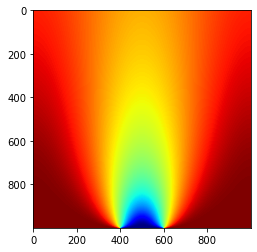

In [13]:
fig, axe = plt.subplots()
axe.imshow(np.flipud(u))